### BREAST CANCER DETECTION.

#### About Dataset

##### Worldwide, breast cancer is the most common type of cancer in women and the second highest in terms of mortality rates.Diagnosis of breast cancer is performed when an abnormal lump is found (from self-examination or x-ray) or a tiny speck of calcium is seen (on an x-ray). After a suspicious lump is found, the doctor will conduct a diagnosis to determine whether it is cancerous and, if so, whether it has spread to other parts of the body.
##### 
This breast cancer dataset was obtained from the University of Wisconsin Hospitals, Madison from Dr. William H. Wolberg.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Laoding Data

In [2]:
df = pd.read_csv("Breast_cancer_data.csv")

In [3]:
df.head(3)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.8,1001.0,0.11840,0
1,20.57,17.77,132.9,1326.0,0.08474,0
2,19.69,21.25,130.0,1203.0,0.10960,0


### Renaming columns

In [3]:
df = df.rename(columns = {"mean_radius" : "mean radius" , "mean_texture" : "mean texture" , "mean_area": "mean area" , "mean_smoothness" : "mean smoothness" , "mean_perimeter" : "mean perimeter"})

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.98100,11.70000,13.37000,15.7800,28.1100
mean texture,569.0,19.289649,4.301036,9.71000,16.17000,18.84000,21.8000,39.2800
mean perimeter,569.0,91.969033,24.298981,43.79000,75.17000,86.24000,104.1000,188.5000
mean area,569.0,654.889104,351.914129,143.50000,420.30000,551.10000,782.7000,2501.0000
mean smoothness,569.0,0.096360,0.014064,0.05263,0.08637,0.09587,0.1053,0.1634
diagnosis,569.0,0.627417,0.483918,0.00000,0.00000,1.00000,1.0000,1.0000


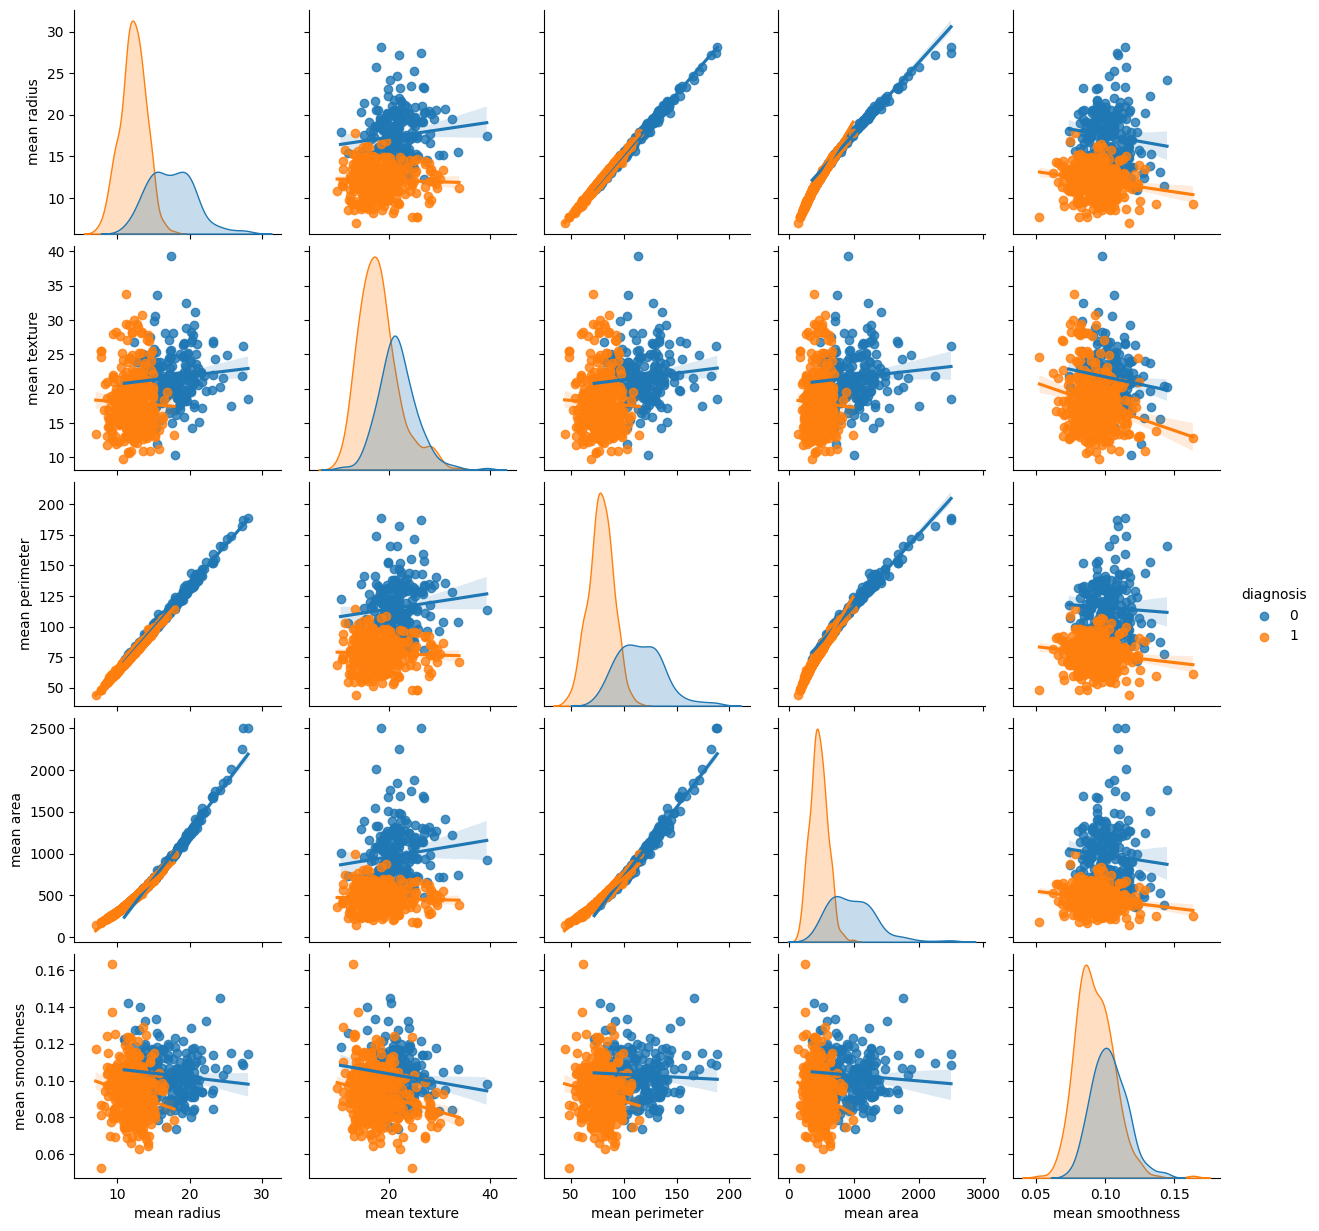

In [13]:
sns.pairplot(df , kind='reg' , hue = "diagnosis")

Above are the summary statistics for our dataset. We have 569 entries in total and five features. Four features are numeric and one is categorical.

#### Checking for missing data.

In [6]:
df.isnull().sum()

mean radius        0
mean texture       0
mean perimeter     0
mean area          0
mean smoothness    0
diagnosis          0
dtype: int64

##### There are no missing values in our dataset

##### Plotting a correlation heatmap.

<Axes: >

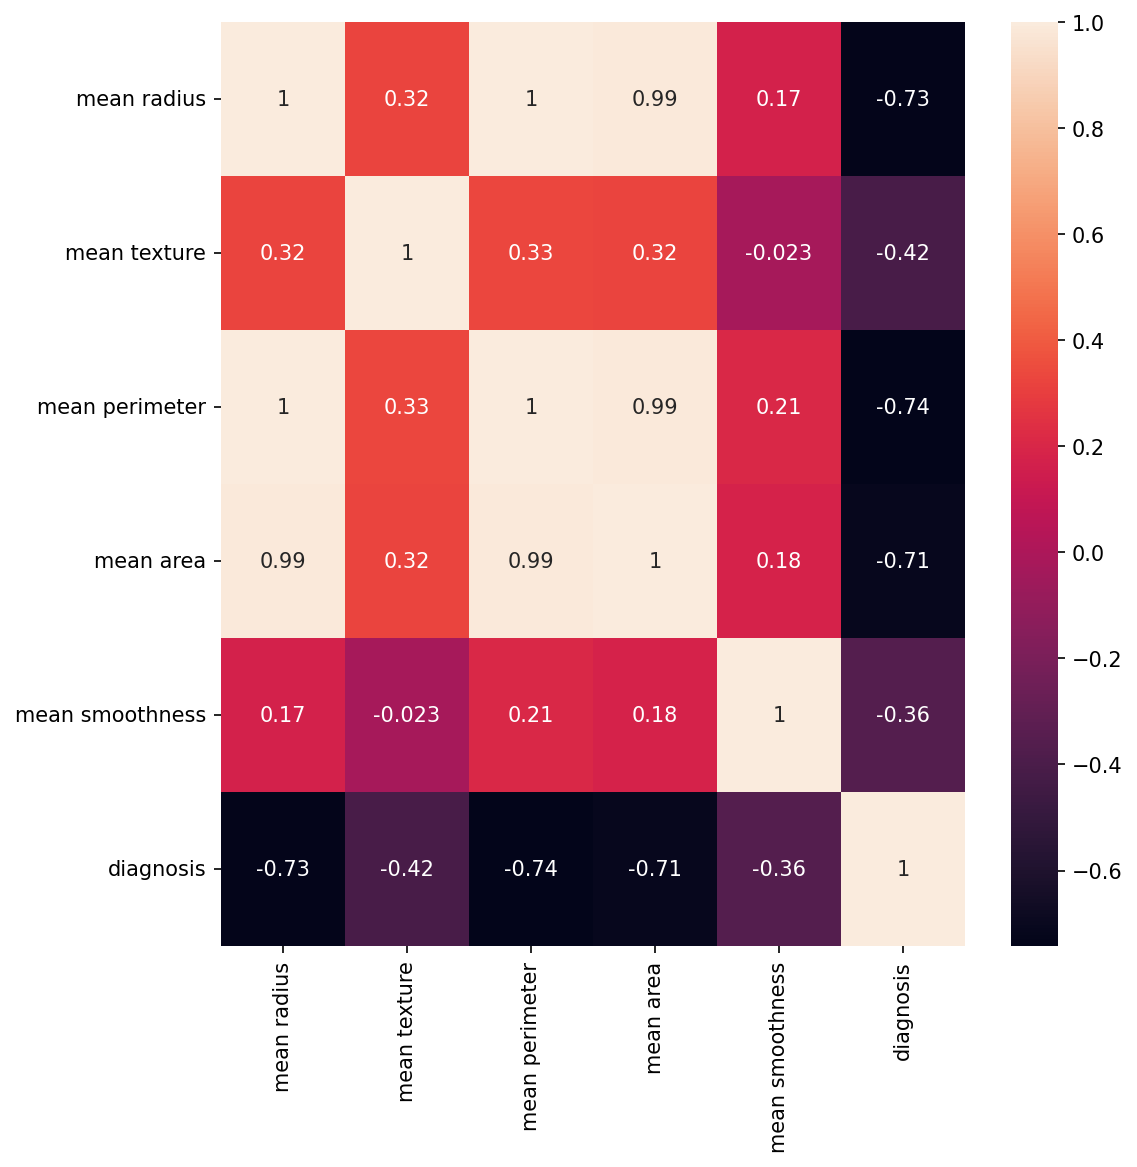

In [7]:
plt.figure(figsize=(8,8) , dpi=150)
sns.heatmap(df.corr(), annot=True)

In [8]:
df.corr()["diagnosis"].sort_values(ascending=True)

mean perimeter    -0.742636
mean radius       -0.730029
mean area         -0.708984
mean texture      -0.415185
mean smoothness   -0.358560
diagnosis          1.000000
Name: diagnosis, dtype: float64

<Axes: xlabel='mean perimeter', ylabel='mean radius'>

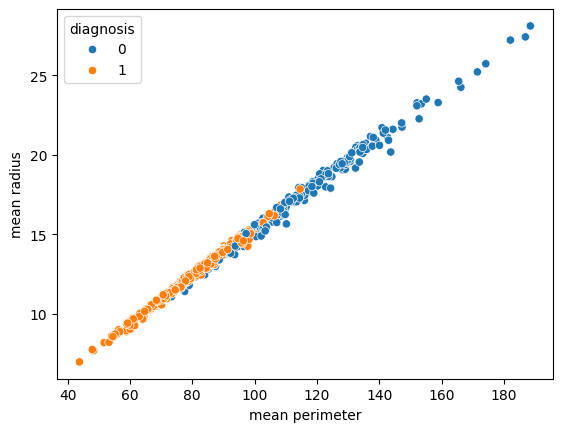

In [9]:
sns.scatterplot(x = "mean perimeter" , y = "mean radius" , data = df , hue = "diagnosis")

<Axes: xlabel='mean area', ylabel='mean texture'>

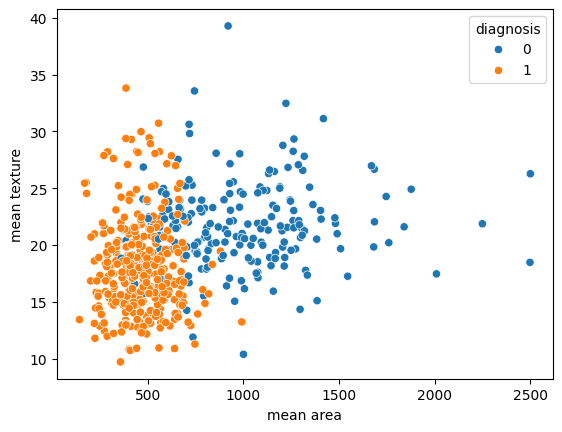

In [10]:
sns.scatterplot(x = "mean area" , y = "mean texture" , data = df, hue = "diagnosis")

<Axes: xlabel='mean smoothness', ylabel='mean texture'>

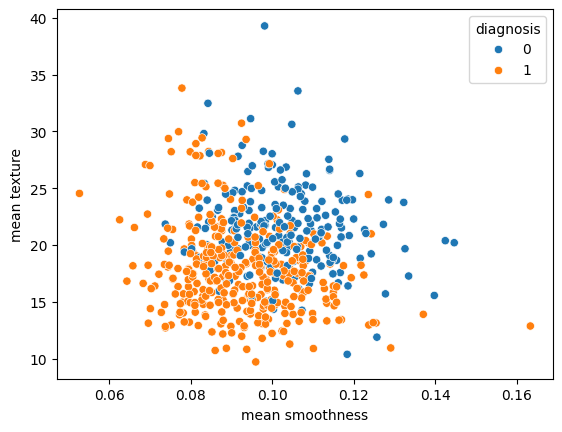

In [11]:
sns.scatterplot(x = "mean smoothness" , y = "mean texture" , data = df , hue = "diagnosis")

### Fitting a logistic regression model
##### A preferred model for thisparticular dataset is logistic regression because the dataset has an outcome variable as a binary value.
### Separating data features.

In [12]:
X = df.drop("diagnosis" , axis = 1)
y = df["diagnosis"]

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#### Splitting data into training and test sets.

In [14]:
from sklearn.model_selection import train_test_split

In [58]:
#Data has been split such that 25% is used for testing and 75% for training.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [60]:
log_model = LogisticRegression()
parameter_grid = {
    'C': list([i/10 for i in range(101)]),# Regularization parameter
    'penalty': ['l1', 'l2','elasticnet'], # Regularization type
    'solver': ['liblinear', 'saga'], # Solver for optimization problem
    'max_iter': list([i * 10 for i in range(11)]) # Maximum number of iterations
}

In [61]:
grid_model = GridSearchCV(log_model, parameter_grid, cv=5, scoring='accuracy', verbose=1)

In [62]:
grid_model.fit(X_train , y_train)

Fitting 5 folds for each of 6666 candidates, totalling 33330 fits


c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.w

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                               1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9,
                               2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, ...],
                         'max_iter': [0, 10, 20, 30, 40, 50, 60, 70, 80, 90,
                                      100],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy', verbose=1)

In [63]:
grid_model.best_params_

{'C': 10.0, 'max_iter': 10, 'penalty': 'l1', 'solver': 'liblinear'}

#### Best performing model had these parameters Regularization parameter of 10 , Regularization type is L1 , solver as liblinear.

In [64]:
optimal_model = grid_model.best_estimator_

In [65]:
accuracy_score = optimal_model.score(X_test, y_test)
accuracy_score

0.9090909090909091

In [66]:
predictions = optimal_model.predict(X_test)

In [67]:
from sklearn.metrics import ConfusionMatrixDisplay , confusion_matrix

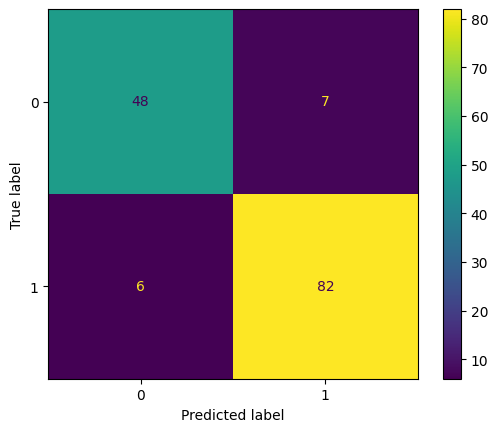

In [68]:
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

##### Our model h performed with an accuracy of 92.3%

### Fitting model on the whole dataset.

In [23]:
logistic_model = LogisticRegression(C = 10 , max_iter = 300 , penalty = 'l1' , solver = 'liblinear')

In [24]:
logistic_model.fit(X,y)

LogisticRegression(C=10, max_iter=300, penalty='l1', solver='liblinear')

### Saving our model and loading in order to test its performance.

In [25]:
import joblib

In [26]:
joblib.dump(logistic_model, "log_model.pkl")

['log_model.pkl']

In [115]:
df1 = df.head(1)
df2 = df.head(1)
df2['diagnosis']
df1 = df1.drop("diagnosis", axis = 1)
df.head(1)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,diagnosis
0,17.99,10.38,122.8,1001.0,0.1184,0


In [116]:
my_model = joblib.load("log_model.pkl")

In [117]:
my_model.predict(df1)

array([0], dtype=int64)

In [118]:
columns = list(X.columns)

In [119]:
joblib.dump(columns , "columns.pkl")

['columns.pkl']